In [ ]:
#imports
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import random as rd

# remove warnings
import warnings
warnings.simplefilter(action='ignore')

### Import of ESS dataset

In [ ]:
ess = pd.read_csv('ESS9e03_1.csv', low_memory = False)

In [ ]:
ess.head(20)

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,domain
0,ESS9e03_1,9,3.1,17.02.2021,27,AT,0.581174,0.218111,0.302091,0.065890,...,2018,20.0,19.0,2.0,12,2018,21.0,7.0,46.0,2.0
1,ESS9e03_1,9,3.1,17.02.2021,137,AT,1.062772,0.413473,0.302091,0.124907,...,2018,9.0,39.0,19.0,12,2018,11.0,6.0,73.0,2.0
2,ESS9e03_1,9,3.1,17.02.2021,194,AT,1.376509,2.270293,0.302091,0.685836,...,2018,19.0,13.0,12.0,11,2018,20.0,48.0,92.0,2.0
3,ESS9e03_1,9,3.1,17.02.2021,208,AT,0.993399,0.386483,0.302091,0.116753,...,2018,16.0,31.0,26.0,11,2018,18.0,49.0,134.0,2.0
4,ESS9e03_1,9,3.1,17.02.2021,220,AT,0.377353,1.032102,0.302091,0.311789,...,2018,13.0,53.0,5.0,12,2018,14.0,39.0,40.0,2.0
5,ESS9e03_1,9,3.1,17.02.2021,254,AT,1.479353,0.575545,0.302091,0.173867,...,2018,16.0,14.0,3.0,12,2018,17.0,12.0,52.0,2.0
6,ESS9e03_1,9,3.1,17.02.2021,290,AT,0.991758,0.720604,0.302091,0.217688,...,2018,14.0,39.0,29.0,9,2018,15.0,57.0,75.0,2.0
7,ESS9e03_1,9,3.1,17.02.2021,301,AT,0.309859,0.130113,0.302091,0.039306,...,2018,17.0,45.0,9.0,11,2018,18.0,56.0,67.0,2.0
8,ESS9e03_1,9,3.1,17.02.2021,305,AT,1.230384,1.770760,0.302091,0.534931,...,2018,16.0,19.0,10.0,10,2018,17.0,11.0,32.0,2.0
9,ESS9e03_1,9,3.1,17.02.2021,400,AT,0.458836,0.742814,0.302091,0.224398,...,2018,12.0,27.0,27.0,10,2018,13.0,48.0,75.0,2.0


#### Selecting only France

In [ ]:
france = ess[ess['cntry'] == 'FR']
france

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,domain
20442,ESS9e03_1,9,3.1,17.02.2021,23,FR,1.119029,0.914294,2.726687,2.492995,...,2018,16.0,1.0,20.0,12,2018,17.0,11.0,70.0,2.0
20443,ESS9e03_1,9,3.1,17.02.2021,41,FR,0.537166,0.741584,2.726687,2.022066,...,2019,13.0,59.0,6.0,2,2019,14.0,51.0,52.0,1.0
20444,ESS9e03_1,9,3.1,17.02.2021,53,FR,1.712321,1.218063,2.726687,3.321277,...,2019,9.0,22.0,7.0,1,2019,10.0,28.0,66.0,2.0
20445,ESS9e03_1,9,3.1,17.02.2021,83,FR,1.036066,0.925803,2.726687,2.524374,...,2019,15.0,30.0,8.0,1,2019,16.0,40.0,70.0,1.0
20446,ESS9e03_1,9,3.1,17.02.2021,98,FR,0.566907,2.774719,2.726687,7.565790,...,2018,9.0,0.0,21.0,11,2018,9.0,59.0,59.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22447,ESS9e03_1,9,3.1,17.02.2021,69851,FR,1.677517,1.472812,2.726687,4.015897,...,2019,9.0,57.0,23.0,1,2019,10.0,38.0,41.0,2.0
22448,ESS9e03_1,9,3.1,17.02.2021,69860,FR,0.571441,0.553700,2.726687,1.509766,...,2018,13.0,33.0,17.0,12,2018,15.0,6.0,93.0,2.0
22449,ESS9e03_1,9,3.1,17.02.2021,69952,FR,1.131332,3.999952,2.726687,10.906615,...,2019,16.0,47.0,11.0,1,2019,17.0,54.0,67.0,2.0
22450,ESS9e03_1,9,3.1,17.02.2021,69962,FR,0.527490,0.492084,2.726687,1.341760,...,2018,10.0,39.0,4.0,12,2018,10.0,49.0,10.0,1.0


#### Droping Nans

In [ ]:
fr_ess = france[['netusoft', 'polintr', 'trstprt', 'stflife', 'stfeco', 'sclmeet', 'agea']]
fr_ess = fr_ess[(fr_ess['netusoft'] != 7) & (fr_ess['netusoft'] != 8) & (fr_ess['netusoft']!=9)]
fr_ess = fr_ess[(fr_ess['trstprt'] != 77) & (fr_ess['trstprt'] != 88) & (fr_ess['trstprt'] !=99)]
fr_ess = fr_ess[(fr_ess['stflife'] != 77) & (fr_ess['stflife'] != 88) & (fr_ess['stflife'] !=99)]
fr_ess = fr_ess[(fr_ess['stfeco'] != 77) & (fr_ess['stfeco'] != 88) & (fr_ess['stfeco'] !=99)]
fr_ess = fr_ess[(fr_ess['sclmeet'] != 77) & (fr_ess['sclmeet'] != 88) & (fr_ess['sclmeet'] !=99)]
fr_ess = fr_ess[(fr_ess['agea'] != 999)]
fr_ess

,netusoft,polintr,trstprt,stflife,stfeco,sclmeet,agea
20442,3,1,2,6,3,6,72
20443,5,3,5,9,5,7,30
20444,5,1,1,6,0,6,77
20445,5,4,0,7,0,3,24
20446,1,4,3,3,3,2,50
...,...,...,...,...,...,...,...
22446,5,3,0,0,0,6,77
22447,5,3,3,4,3,7,43
22448,2,3,3,6,2,6,71
22449,5,3,4,3,2,5,45


### Generation of MCAR missing data

In [ ]:
empty_list = []
random_list = [rd.randint(1, 1900) for _ in range(10000)] # for random choosing data
for n in random_list:
    item = fr_ess.iloc[n:n+10,:] # making the slices
    mask = np.random.choice([True, False], size=tuple([len(item), 1])) # mask for column with missings
    matrix = np.full((len(item), item.shape[1] - 1), False)

    number = rd.randint(1, 7)
    matrix_new = np.concatenate((matrix[:, :number], mask, matrix[:, number:]), axis=1)  # mask for full data slice

    MCAR_matrix = item.mask(matrix_new) # making MCAR missing data
    empty_list.append([MCAR_matrix.to_numpy(), matrix_new])

In [ ]:
result_1 = pd.DataFrame(empty_list, columns = ['Xobs', 'Xmis'])
result_1

,Xobs,Xmis
0,"[[3.0, 1.0, 5.0, 6.0, 1.0, nan, 72.0], [5.0, 3...","[[False, False, False, False, False, True, Fal..."
1,"[[5.0, 2.0, 5.0, 6.0, 4.0, 7.0, 45.0], [5.0, 2...","[[False, False, False, False, False, False, Fa..."
2,"[[5.0, 3.0, 5.0, 5.0, 4.0, 6.0, 22.0], [5.0, 3...","[[False, False, False, False, False, False, Fa..."
3,"[[5.0, 2.0, 6.0, 5.0, 5.0, 6.0, 60.0], [5.0, 2...","[[False, False, False, False, False, False, Fa..."
4,"[[5.0, 2.0, nan, 2.0, 2.0, 7.0, 18.0], [5.0, 1...","[[False, False, True, False, False, False, Fal..."
...,...,...
9995,"[[5.0, 1.0, 2.0, 4.0, 3.0, 4.0, 57.0], [3.0, 1...","[[False, False, False, False, False, False, Fa..."
9996,"[[4.0, 1.0, 3.0, nan, 5.0, 6.0, 73.0], [5.0, 3...","[[False, False, False, True, False, False, Fal..."
9997,"[[5.0, 4.0, 1.0, nan, 1.0, 6.0, 50.0], [1.0, 2...","[[False, False, False, True, False, False, Fal..."
9998,"[[5.0, 3.0, 3.0, 6.0, 3.0, 7.0, 24.0], [5.0, 3...","[[False, False, False, False, False, False, Fa..."


In [ ]:
result_1['MDM'] = 0 #MCAR => 0
result_1

,Xobs,Xmis,MDM
0,"[[3.0, 1.0, 5.0, 6.0, 1.0, nan, 72.0], [5.0, 3...","[[False, False, False, False, False, True, Fal...",0
1,"[[5.0, 2.0, 5.0, 6.0, 4.0, 7.0, 45.0], [5.0, 2...","[[False, False, False, False, False, False, Fa...",0
2,"[[5.0, 3.0, 5.0, 5.0, 4.0, 6.0, 22.0], [5.0, 3...","[[False, False, False, False, False, False, Fa...",0
3,"[[5.0, 2.0, 6.0, 5.0, 5.0, 6.0, 60.0], [5.0, 2...","[[False, False, False, False, False, False, Fa...",0
4,"[[5.0, 2.0, nan, 2.0, 2.0, 7.0, 18.0], [5.0, 1...","[[False, False, True, False, False, False, Fal...",0
...,...,...,...
9995,"[[5.0, 1.0, 2.0, 4.0, 3.0, 4.0, 57.0], [3.0, 1...","[[False, False, False, False, False, False, Fa...",0
9996,"[[4.0, 1.0, 3.0, nan, 5.0, 6.0, 73.0], [5.0, 3...","[[False, False, False, True, False, False, Fal...",0
9997,"[[5.0, 4.0, 1.0, nan, 1.0, 6.0, 50.0], [1.0, 2...","[[False, False, False, True, False, False, Fal...",0
9998,"[[5.0, 3.0, 3.0, 6.0, 3.0, 7.0, 24.0], [5.0, 3...","[[False, False, False, False, False, False, Fa...",0


### Generation of MAR missing data

In [ ]:
empty_list = []
counter = 0
random_list = [rd.randint(1, 1900) for _ in range(10000)] #list for subsampling from dataset
for n in random_list:
    item = fr_ess.iloc[n:n+10,:]
    m = rd.randint(0, 6) #random chosing for a column on which will depend missing data

    lst = list(fr_ess.iloc[n:n+10,:].iloc[:, m].unique())
    if len(lst) > 4:
        lst_for_threshold = sorted(lst)[1:-1]
    else:
        lst_for_threshold = sorted(lst)

    threshold = rd.choice(lst_for_threshold) #chosing the threshold for missing data
    probability_missing = [0.8, 0.9, 1.0]  #probabilities for data being missed

    if counter%2 == 0: #changing of > and < sign
        item['MissingProbability'] = np.where(item.iloc[:, m] > threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] > threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)
    else:
        item['MissingProbability'] = np.where(item.iloc[:, m] < threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] < threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)

    item['new'] = item['MissingProbability_3'].apply(lambda row: rd.choices([True, False], weights=row, k=1)[0])
    number = rd.randint(1, 6) #chose a number for a column with missings
    while m == number: #check the inequality of number of column with missings and the column which determines the probability of missed data
        number = rd.randint(1, 6)
    matrix = np.full((len(item), item.shape[1] - 5), False)
    matrix_new = np.concatenate((matrix[:, :number], item[['new']], matrix[:, number:]), axis=1)
    item.iloc[:, number] = np.where(item['new'].to_numpy(), np.nan, item.iloc[:, number])
    MAR_matrix = item.drop(columns=['MissingProbability', 'MissingProbability_2', 'MissingProbability_3', 'new'])

    empty_list.append([MAR_matrix.to_numpy(), matrix_new])

In [ ]:
result_2 = pd.DataFrame(empty_list, columns = ['Xobs', 'Xmis'])
result_2['MDM'] = 1  #MAR => 1
result_2

,Xobs,Xmis,MDM
0,"[[1.0, 3.0, 2.0, 4.0, 4.0, 4.0, 78.0], [2.0, 2...","[[False, False, False, False, False, False, Fa...",1
1,"[[2.0, 3.0, 2.0, 4.0, 3.0, 5.0, 51.0], [5.0, 4...","[[False, False, False, False, False, False, Fa...",1
2,"[[5.0, 1.0, 7.0, nan, 4.0, 5.0, 68.0], [5.0, 3...","[[False, False, False, True, False, False, Fal...",1
3,"[[5.0, 4.0, nan, 9.0, 2.0, 6.0, 51.0], [5.0, 2...","[[False, False, True, False, False, False, Fal...",1
4,"[[4.0, nan, 3.0, 9.0, 2.0, 4.0, 84.0], [5.0, 4...","[[False, True, False, False, False, False, Fal...",1
...,...,...,...
9995,"[[5.0, 2.0, 5.0, 7.0, 5.0, 6.0, 38.0], [5.0, 2...","[[False, False, False, False, False, False, Fa...",1
9996,"[[4.0, 2.0, 4.0, 10.0, 9.0, 4.0, nan], [4.0, 2...","[[False, False, False, False, False, False, Tr...",1
9997,"[[1.0, 2.0, 4.0, nan, 5.0, 3.0, 56.0], [4.0, 4...","[[False, False, False, True, False, False, Fal...",1
9998,"[[5.0, 1.0, 6.0, 8.0, 5.0, 6.0, 70.0], [5.0, 3...","[[False, False, False, False, False, False, Fa...",1


### Generation of MNAR missing data

In [ ]:
empty_list = []
counter = 0
random_list = [rd.randint(1, 1900) for _ in range(10000)] #list for subsampling from dataset
for n in random_list:
    item = fr_ess.iloc[n:n+10,:]
    m = rd.randint(1, 6) #random chosing for a column with missing

    #manipulations for threshold
    lst = list(fr_ess.iloc[n:n+10,:].iloc[:, m].unique())
    if len(lst) > 4:
        lst_for_threshold = sorted(lst)[1:-1]
    else:
        lst_for_threshold = sorted(lst)

    threshold = rd.choice(lst_for_threshold) #chosing the threshold for missing data
    probability_missing = [0.8, 0.9, 1.0]  #probabilities for data being missed

    if counter%2 == 0: #changing of > and < sign
        item['MissingProbability'] = np.where(item.iloc[:, m] > threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] > threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)
    else:
        item['MissingProbability'] = np.where(item.iloc[:, m] < threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] < threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)

    item['new'] = item['MissingProbability_3'].apply(lambda row: rd.choices([True, False], weights=row, k=1)[0])

    number = m  #as well as the column with missings depends on itself

    matrix = np.full((len(item), item.shape[1] - 5), False)
    matrix_new = np.concatenate((matrix[:, :number], item[['new']], matrix[:, number:]), axis=1)

    item.iloc[:, number] = np.where(item['new'].to_numpy(), np.nan, item.iloc[:, number])

    MAR_matrix = item.drop(columns=['MissingProbability', 'MissingProbability_2', 'MissingProbability_3', 'new'])

    empty_list.append([MAR_matrix.to_numpy(), matrix_new])

In [ ]:
result_3 = pd.DataFrame(empty_list, columns = ['Xobs', 'Xmis'])
result_3['MDM'] = 2  #MNAR => 2
result_3

,Xobs,Xmis,MDM
0,"[[5.0, 1.0, 6.0, 7.0, 5.0, 7.0, 51.0], [5.0, 3...","[[False, False, False, False, False, False, Fa...",2
1,"[[5.0, nan, 5.0, 7.0, 5.0, 4.0, 26.0], [5.0, n...","[[False, True, False, False, False, False, Fal...",2
2,"[[5.0, 4.0, 0.0, 2.0, 1.0, 6.0, 38.0], [5.0, 2...","[[False, False, False, False, False, False, Fa...",2
3,"[[1.0, 2.0, 6.0, 8.0, 5.0, 3.0, 63.0], [5.0, 1...","[[False, False, False, False, False, False, Fa...",2
4,"[[5.0, 3.0, 6.0, 8.0, 4.0, 6.0, 64.0], [1.0, 1...","[[False, False, False, False, False, False, Fa...",2
...,...,...,...
9995,"[[5.0, nan, 0.0, 4.0, 0.0, 6.0, 23.0], [4.0, 2...","[[False, True, False, False, False, False, Fal...",2
9996,"[[5.0, 4.0, 1.0, nan, 3.0, 5.0, 33.0], [5.0, 1...","[[False, False, False, True, False, False, Fal...",2
9997,"[[2.0, 3.0, 1.0, nan, 2.0, 6.0, 62.0], [5.0, 1...","[[False, False, False, True, False, False, Fal...",2
9998,"[[5.0, 3.0, nan, 4.0, 5.0, 4.0, 44.0], [5.0, 2...","[[False, False, True, False, False, False, Fal...",2


### The concatenated dataframe with final training dataset

In [ ]:
cnct_df = pd.concat([result_1, result_2, result_3]).reset_index()
cnct_df

,index,Xobs,Xmis,MDM
0,0,"[[3.0, 1.0, 5.0, 6.0, 1.0, nan, 72.0], [5.0, 3...","[[False, False, False, False, False, True, Fal...",0
1,1,"[[5.0, 2.0, 5.0, 6.0, 4.0, 7.0, 45.0], [5.0, 2...","[[False, False, False, False, False, False, Fa...",0
2,2,"[[5.0, 3.0, 5.0, 5.0, 4.0, 6.0, 22.0], [5.0, 3...","[[False, False, False, False, False, False, Fa...",0
3,3,"[[5.0, 2.0, 6.0, 5.0, 5.0, 6.0, 60.0], [5.0, 2...","[[False, False, False, False, False, False, Fa...",0
4,4,"[[5.0, 2.0, nan, 2.0, 2.0, 7.0, 18.0], [5.0, 1...","[[False, False, True, False, False, False, Fal...",0
...,...,...,...,...
29995,9995,"[[5.0, nan, 0.0, 4.0, 0.0, 6.0, 23.0], [4.0, 2...","[[False, True, False, False, False, False, Fal...",2
29996,9996,"[[5.0, 4.0, 1.0, nan, 3.0, 5.0, 33.0], [5.0, 1...","[[False, False, False, True, False, False, Fal...",2
29997,9997,"[[2.0, 3.0, 1.0, nan, 2.0, 6.0, 62.0], [5.0, 1...","[[False, False, False, True, False, False, Fal...",2
29998,9998,"[[5.0, 3.0, nan, 4.0, 5.0, 4.0, 44.0], [5.0, 2...","[[False, False, True, False, False, False, Fal...",2


### Step 1. HistGradientBoostingClassifier

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


X = cnct_df['Xobs']
y = cnct_df['MDM']
X = [arr.ravel() for arr in X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 34)

clf = HistGradientBoostingClassifier(l2_regularization = 1.5, learning_rate = 0.5, random_state=34)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model quality
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5218888888888888


#### Confusion matrix

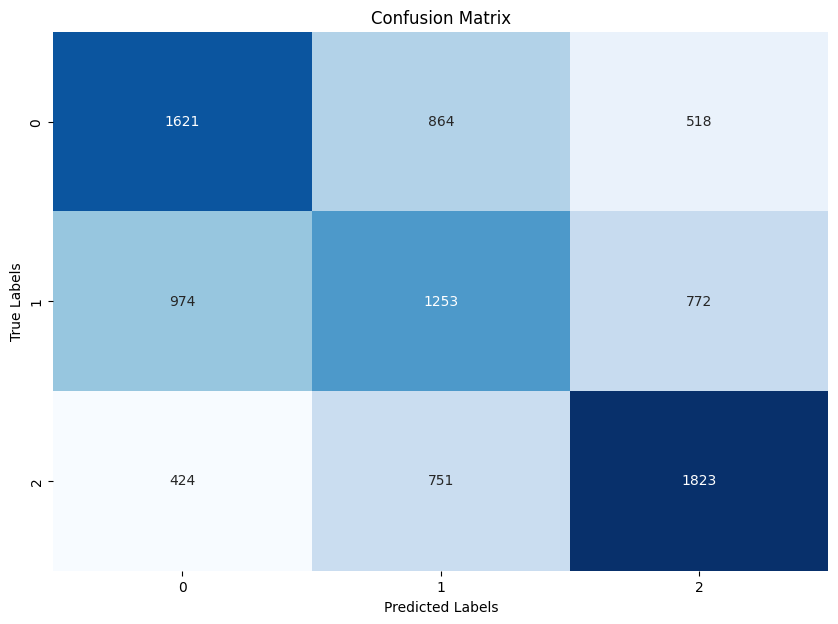

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Changing the hyperparameter learning rate

In [ ]:
X = cnct_df['Xobs']
y = cnct_df['MDM']

X = [arr.ravel() for arr in X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = 34)

learning_rates = [0.001, 0.01, 0.1, 0.5]

for lr in learning_rates:
    clf = HistGradientBoostingClassifier(l2_regularization=1.5, learning_rate=lr, random_state = 34)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Model quality
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Learning Rate: {lr} - Accuracy: {accuracy}")

Learning Rate: 0.001 - Accuracy: 0.4185185185185185
Learning Rate: 0.01 - Accuracy: 0.4411111111111111
Learning Rate: 0.1 - Accuracy: 0.4514814814814815
Learning Rate: 0.5 - Accuracy: 0.4622222222222222
